In [33]:
import numpy as np

# Distance run in miles
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Amount of water consumed in liters
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [24]:
from sklearn.linear_model import LinearRegression

#Reshaping Data
X_reshaped = X.reshape(-1, 1)

regressor = LinearRegression()  
regressor.fit(X, Y) #training the algorithm
y_pred = regressor.predict(X)

Text(0, 0.5, 'Water Drinks (Litre)')

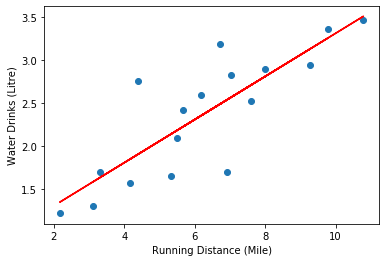

In [26]:
import matplotlib.pyplot as plt

plt.scatter(X_reshaped, Y)
plt.plot(X_reshaped, y_pred, color='red')
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

In [22]:
regressor.predict([[5.0]])

array([[2.05697595]])

In [23]:
print(regressor.coef_)

print(regressor.intercept_)

[[0.25163494]]
[0.79880123]


$MSE = f(w_1, w_0)= \frac{1}{N} \sum_{i=0}^{N-1} (w_1x[i] + w_0 - y[i])^2$

In [68]:
def find_MSE(x, y, w1, w0):
    y_pred = [w1*i + w0 for i in x]
    mse = sum([(i-j)**2 for i, j in zip(y, y_pred)]) / len(y)
    return mse

In [69]:
print(find_MSE(X,Y,0.25163494, 0.79880123))

0.15385767404191164


In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = [0.25163494*i + 0.79880123 for i in X]
mean_squared_error(Y, y_pred)

0.15385767404191164

In [73]:
r2_score(Y, y_pred)

0.6928760302783591

In [77]:
import pandas as pd

df = pd.read_csv("Notebooks/Datasets/Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]

# Use the top 150 companies to train the Linear Regression Model
X_train = df[feature_cols][:150]
Y_train = df.sales[:150]


In [76]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [78]:
# Instansiate the model (Linear Regression) and train it
sales_reg = LinearRegression()
sales_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
#Best w1, w2, w3, and w0
print("Printing the coefficient and y intercept of our first 150 sales")
print(sales_reg.coef_)
print(sales_reg.intercept_)

Printing the coefficient and y intercept of our first 150 sales
[ 0.04700012  0.17993257 -0.00140273]
3.029766796293691


In [82]:
# Predict the botton 50 companies' sales
X_test = df[feature_cols][-50:]
Y_test = df.sales[-50:]
print("Predicting the sales of the bottom 50 companies (last ones)")
y_pred = sales_reg.predict(X_test)
print(sales_reg.predict(X_test))

Predicting the sales of the bottom 50 companies (last ones)
[18.67186188 10.15990172 16.48950045 18.17132726 15.63964047  5.30168953
 15.19930681 10.27021058 10.15577653 12.48190724 14.35100299 13.43010832
 15.10545883 17.32542469 11.17561481 14.54411372 10.60623457 13.6578278
 17.31920373 18.29020846  7.44118029 14.4553876   7.54376735 12.20415315
 14.07598825 24.7841683  20.11008458 12.38328494 16.41529992 12.58762415
 10.84616747 14.23249384  6.65512798 24.18338541 18.74887883 20.75225663
  9.92682913 17.15002463 18.96767352  6.05302918 12.27336433  8.51313117
  4.53156602 18.42150484 16.46286778  5.47156415  8.32748549 13.01318332
 23.82330766 15.4737108 ]


In [83]:
print(sales_reg.score(X_test, Y_test))
print(r2_score(Y_test, sales_reg.predict(X_test)))

0.8963519785440216
0.8963519785440216


In [88]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [92]:
#Predicting a company with 100 in TV, 100 in Radio, and 20 in newspaper
sales_reg.predict([[100, 100, 20]])

array([25.69498118])

In [93]:
#Predicting the sales of one of the companies
w = [0.04700012, 0.17993257, -0.00140273]
w0 = 3.029766796293691

sales_predict196 = w[0]*38.2 + w[1]*3.7 + w[2]*13.8 + w0
print(sales_predict196)

5.471564215293691
